In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [2]:
img = cv2.imread("starry_night.png", cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

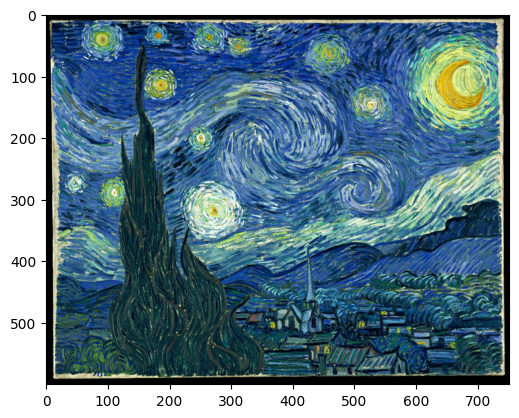

In [ ]:
plt.imshow(img)

In [4]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

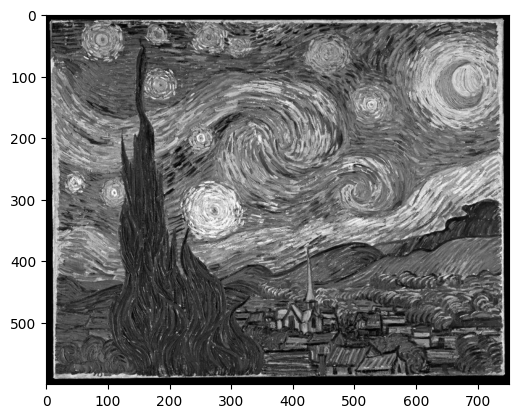

In [5]:
plt.imshow(img_gray, cmap="gray")

In [6]:
blurred = cv2.GaussianBlur(img_gray, (5, 5), 0)
edged = cv2.Canny(blurred, 10, 100)

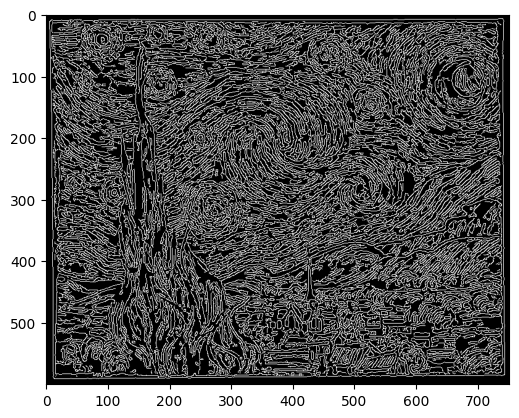

In [7]:
plt.imshow(edged, cmap='gray')

In [19]:
contours, hierarchy = cv2.findContours(edged, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
img_copy = img.copy()
hierarchy = hierarchy[0]
contours = [contours[i] for i in range(len(contours)) if hierarchy[i][2] == -1]
contours = list(sorted(contours, key=cv2.contourArea, reverse=True))

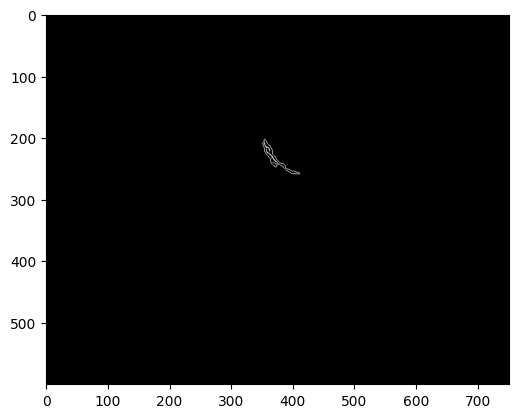

In [59]:
img_mask = np.zeros((img.shape[0], img.shape[1]), dtype=np.uint8)

cv2.drawContours(img_mask, contours[0:1], -1, 1, thickness=1)
plt.imshow(img_mask, cmap="gray")

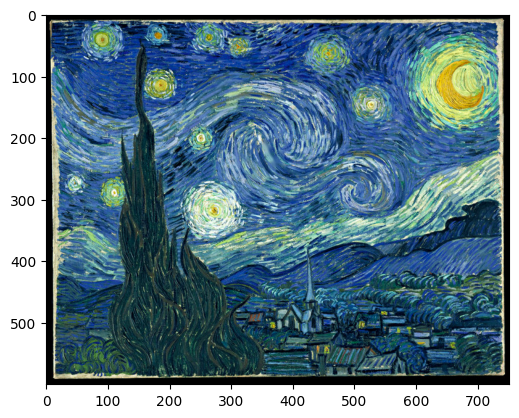

In [ ]:
dst = cv2.inpaint(img_copy, img_mask, 4, cv2.INPAINT_TELEA)
plt.imshow(dst)

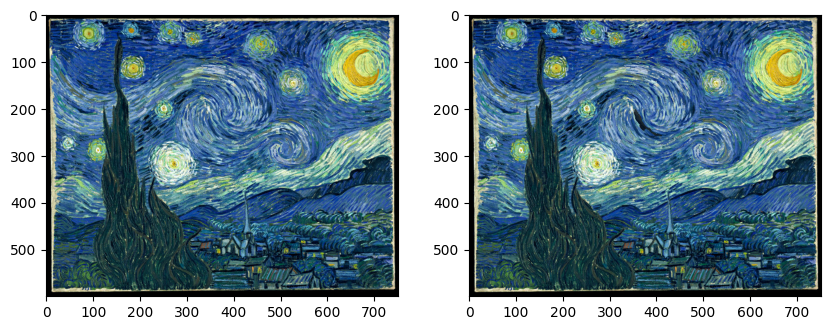

In [55]:
dst = cv2.cvtColor(img_copy, cv2.COLOR_RGB2HSV)
plt.figure(figsize=(10,6))
plt.subplot(1, 2, 1)
plt.imshow(img_copy)
dst = dst \
      - dst * img_mask[:, :, None] \
      + dst * img_mask[:, :, None] * np.array([1, 1, np.random.rand()])[None, None, :]
dst = cv2.cvtColor(dst.astype(np.uint8), cv2.COLOR_HSV2RGB)
plt.subplot(1, 2, 2)
plt.imshow(dst)